**Mô hình phân loại thú cưng**

Dữ liệu

Tập dữ liệu gồm 2611 ảnh thú cưng, được chia thành 3 nhóm: cats , dogs , parrots . Các ảnh
được đặt trong các thư mục cats , dogs , parrots tương ứng với nhóm thú cưng của ảnh đó.
Cấu trúc thư mục:

├── cats

├── dogs

└── parrots


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [31]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 6.2 MB/s eta 0:00:00


In [32]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import visualkeras
from keras.callbacks import EarlyStopping

In [33]:
dir_path = '/content/drive/MyDrive/resized_256x256'


In [34]:
train_ds = keras.utils.image_dataset_from_directory(dir_path,
                                                    labels="inferred",
                                                    label_mode="int",
                                                    validation_split=0.36,
                                                    batch_size=32,
                                                    seed=45,
                                                    subset="training")
val_ds = keras.utils.image_dataset_from_directory(dir_path,
                                                  labels="inferred",
                                                  label_mode="int",
                                                  validation_split=0.36,
                                                  batch_size=32,
                                                  seed=45,
                                                  subset="validation")
val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take((20*val_batches) // 36)
val_ds = val_ds.skip((20*val_batches) // 36)

Found 2611 files belonging to 3 classes.
Using 1672 files for training.
Found 2611 files belonging to 3 classes.
Using 939 files for validation.


In [ ]:
IMG_SIZE = 256
resize_and_rescale = keras.models.Sequential([
keras.layers.Resizing(IMG_SIZE, IMG_SIZE),
keras.layers.Rescaling(1./255)
])


In [ ]:
data_augmentation = keras.models.Sequential([
 keras.layers.RandomRotation(.2),
 keras.layers.RandomFlip()
])


**Mô hình 1**

In [ ]:
model_1 = keras.models.Sequential([
    resize_and_rescale,
    data_augmentation,
    keras.layers.Conv2D(64, (5, 5), activation='relu'),
    keras.layers.MaxPooling2D((4, 4)),
    keras.layers.Conv2D(128, (5, 5), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (5, 5), activation='relu'),
    keras.layers.MaxPooling2D((4, 4)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(.5),
    keras.layers.Dense(3, activation='softmax')
])
model_1.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
model_1.build((None, 256, 256, 3))
model_1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 252, 252, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 59, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 29, 29, 128)       0         
 g2D)                                                 

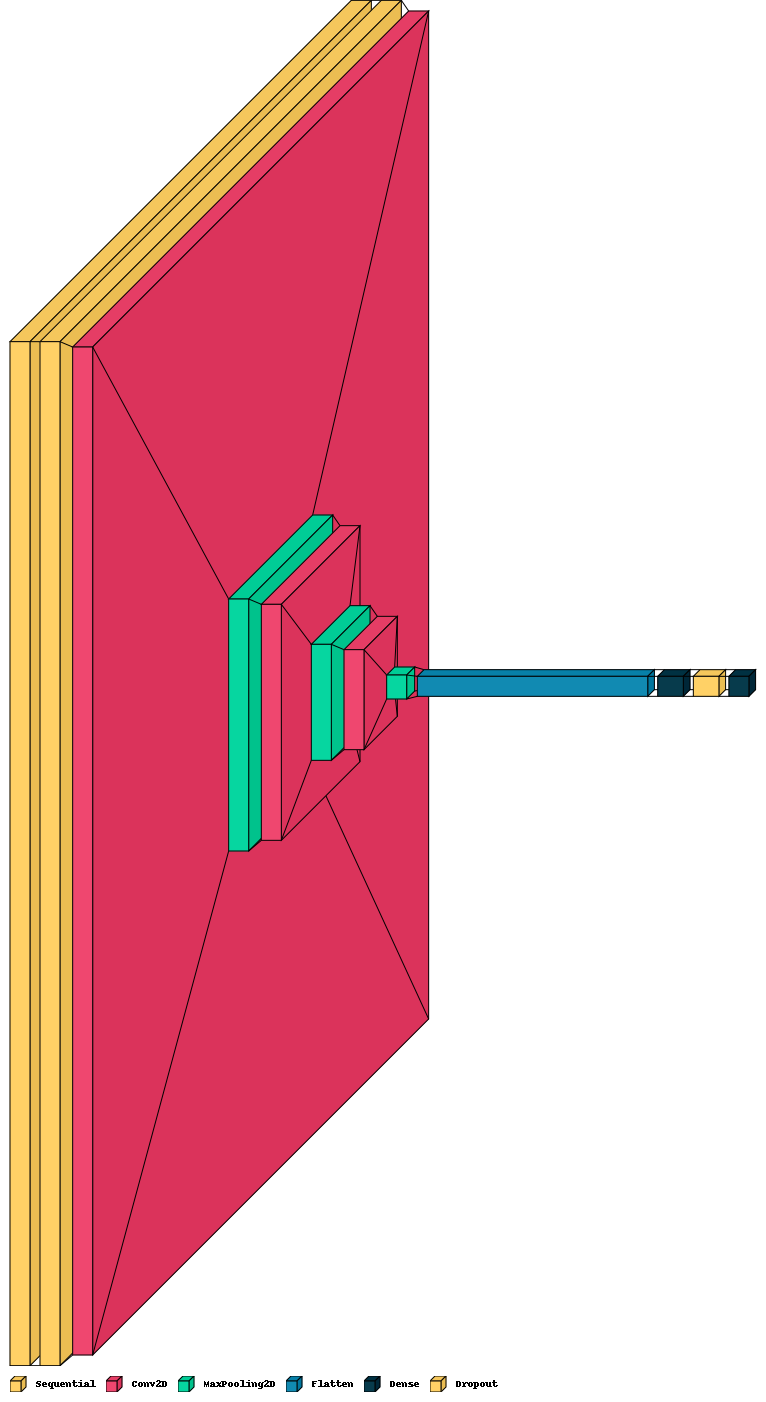

In [ ]:
visualkeras.layered_view(model_1, legend=True)


In [ ]:
train_logs_1 = model_1.fit(train_ds, epochs=200, batch_size=32, validation_data=val_ds)
model_1.save("model/model1.h5")


Epoch 1/200
53/53 [==============================] - 318s 5s/step - loss: 1.0810 - accuracy: 0.3870 - val_loss: 1.0352 - val_accuracy: 0.4778
Epoch 2/200
53/53 [==============================] - 10s 177ms/step - loss: 0.9427 - accuracy: 0.5215 - val_loss: 0.8694 - val_accuracy: 0.5902
Epoch 3/200
53/53 [==============================] - 10s 175ms/step - loss: 0.8477 - accuracy: 0.5801 - val_loss: 0.8449 - val_accuracy: 0.5738
Epoch 4/200
53/53 [==============================] - 9s 160ms/step - loss: 0.7731 - accuracy: 0.6214 - val_loss: 0.7256 - val_accuracy: 0.6534
Epoch 5/200
53/53 [==============================] - 10s 181ms/step - loss: 0.7251 - accuracy: 0.6501 - val_loss: 0.6878 - val_accuracy: 0.6768
Epoch 6/200
53/53 [==============================] - 10s 174ms/step - loss: 0.7090 - accuracy: 0.6567 - val_loss: 0.6569 - val_accuracy: 0.7096
Epoch 7/200
53/53 [==============================] - 11s 201ms/step - loss: 0.6853 - accuracy: 0.6830 - val_loss: 0.7049 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_1.evaluate(test_ds)


16/16 [==============================] - 3s 101ms/step - loss: 0.7181 - accuracy: 0.8223


[0.7181233167648315, 0.822265625]

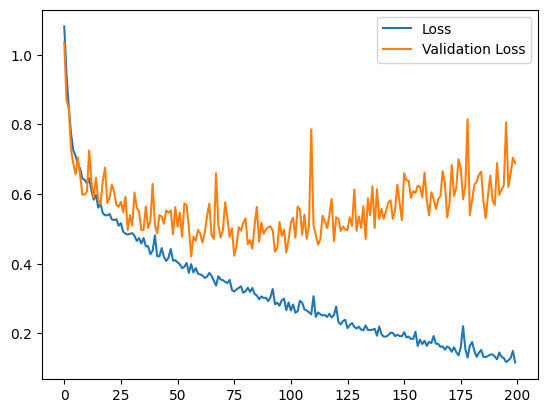

In [ ]:
plt.plot(train_logs_1.history['loss'], label='Loss')
plt.plot(train_logs_1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


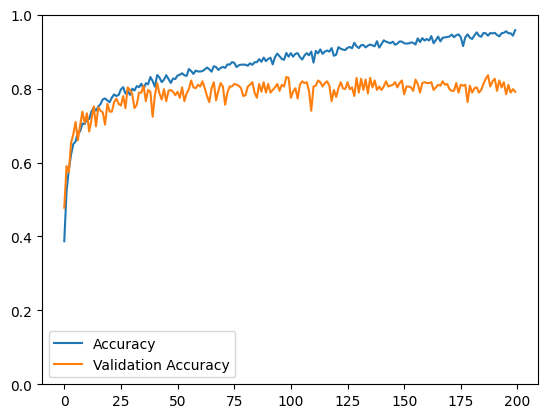

In [ ]:
plt.plot(train_logs_1.history['accuracy'], label='Accuracy')
plt.plot(train_logs_1.history['val_accuracy'], label='Validation Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

**Mô hình 2**

In [ ]:
model_2 = keras.models.Sequential([
    resize_and_rescale,
    data_augmentation,
    keras.layers.Conv2D(64, (5, 5), activation='relu'),
    keras.layers.Conv2D(64, (5, 5), activation='relu'),
    keras.layers.MaxPooling2D((4, 4)),
    keras.layers.Conv2D(128, (5, 5), activation='relu'),
    keras.layers.Conv2D(128, (5, 5), activation='relu'),
    keras.layers.MaxPooling2D((4, 4)),
    keras.layers.Conv2D(64, (5, 5), activation='relu'),
    keras.layers.Conv2D(64, (5, 5), activation='relu'),
    keras.layers.MaxPooling2D((4, 4)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),  # Thêm lớp Dropout vào đây
    keras.layers.Dense(128, activation='relu'), # Thêm một lớp Dense nếu bạn muốn
    keras.layers.Dropout(0.3),  # Thêm lớp Dropout vào đây
    keras.layers.Dense(3, activation='softmax')
])


model_2.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

model_2.build((None, 256, 256, 3))

model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 252, 252, 64)      4864      
                                                                 
 conv2d_4 (Conv2D)           (None, 248, 248, 64)      102464    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 58, 58, 128)       204928    
                                                      

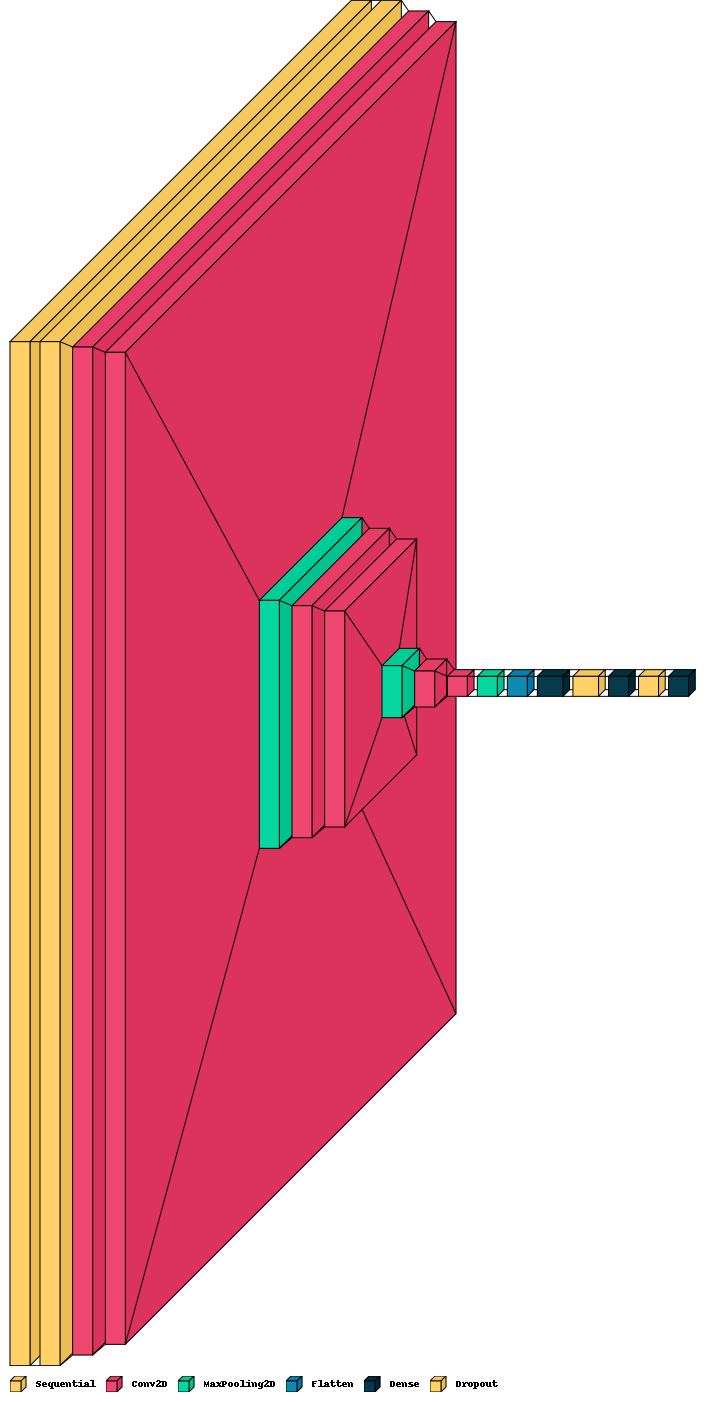

In [ ]:
visualkeras.layered_view(model_2, legend=True)


In [ ]:
train_logs_2 = model_2.fit(train_ds, epochs=150, batch_size=32, validation_data=val_ds)
model_2.save("model/model2.h5")

Epoch 1/150
53/53 [==============================] - 38s 389ms/step - loss: 1.0992 - accuracy: 0.3343 - val_loss: 1.0989 - val_accuracy: 0.4239
Epoch 2/150
53/53 [==============================] - 15s 273ms/step - loss: 1.0777 - accuracy: 0.3989 - val_loss: 1.6480 - val_accuracy: 0.3044
Epoch 3/150
53/53 [==============================] - 15s 272ms/step - loss: 0.9333 - accuracy: 0.5227 - val_loss: 0.8803 - val_accuracy: 0.5738
Epoch 4/150
53/53 [==============================] - 15s 275ms/step - loss: 0.8238 - accuracy: 0.5718 - val_loss: 0.7845 - val_accuracy: 0.6019
Epoch 5/150
53/53 [==============================] - 15s 269ms/step - loss: 0.8082 - accuracy: 0.5915 - val_loss: 0.7804 - val_accuracy: 0.6159
Epoch 6/150
53/53 [==============================] - 15s 271ms/step - loss: 0.7755 - accuracy: 0.6089 - val_loss: 0.7950 - val_accuracy: 0.5925
Epoch 7/150
53/53 [==============================] - 15s 267ms/step - loss: 0.7732 - accuracy: 0.6029 - val_loss: 0.7720 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_2.evaluate(test_ds)


16/16 [==============================] - 2s 101ms/step - loss: 0.6701 - accuracy: 0.8281


[0.6701079607009888, 0.828125]

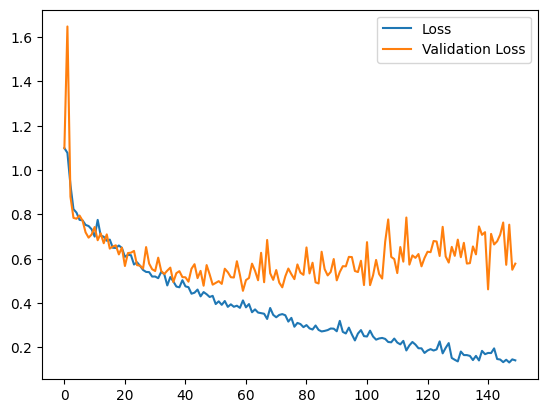

In [ ]:
plt.plot(train_logs_2.history['loss'], label='Loss')
plt.plot(train_logs_2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


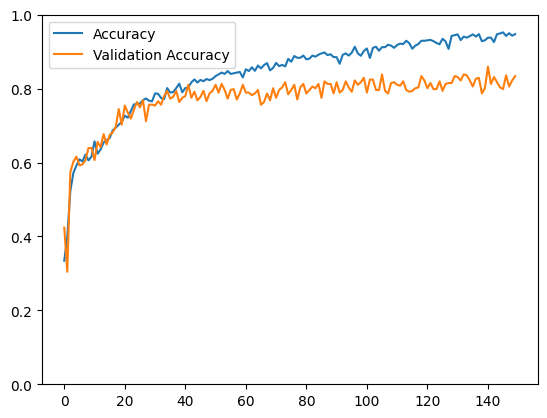

In [ ]:
plt.plot(train_logs_2.history['accuracy'], label='Accuracy')
plt.plot(train_logs_2.history['val_accuracy'], label='Validation Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

**Mô hình 3**

In [ ]:
model_3 = keras.models.Sequential([
    resize_and_rescale,
    data_augmentation,
    keras.layers.Conv2D(64, (5, 5), activation='relu'),
    keras.layers.Conv2D(64, (5, 5), activation='relu'),
    keras.layers.MaxPooling2D((4, 4)),
    keras.layers.Conv2D(128, (5, 5), activation='relu'),
    keras.layers.Conv2D(128, (5, 5), activation='relu'),
    keras.layers.MaxPooling2D((4, 4)),
    keras.layers.Conv2D(64, (5, 5), activation='relu'),
    keras.layers.Conv2D(64, (5, 5), activation='relu'),
    keras.layers.MaxPooling2D((4, 4)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),  # Thêm lớp Dropout vào đây
    keras.layers.Dense(128, activation='relu'), # Thêm một lớp Dense nếu bạn muốn
    keras.layers.Dropout(0.3),  # Thêm lớp Dropout vào đây
    keras.layers.Dense(3, activation='softmax')
])


model_3.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

model_3.build((None, 256, 256, 3))

model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 252, 252, 64)      4864      
                                                                 
 conv2d_10 (Conv2D)          (None, 248, 248, 64)      102464    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 58, 58, 128)       204928    
                                                      

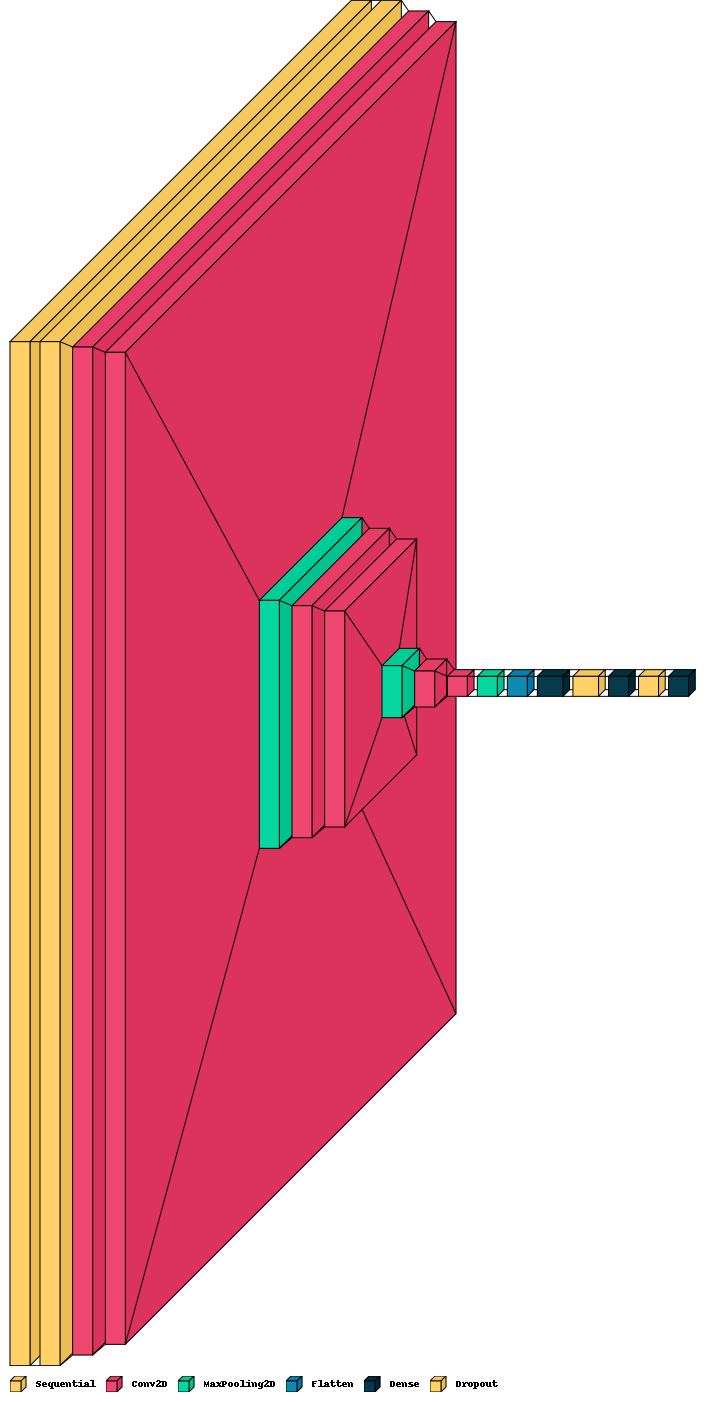

In [ ]:
visualkeras.layered_view(model_3, legend=True)


In [ ]:
# Định nghĩa early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
train_logs_3 = model_3.fit(train_ds, epochs=120, batch_size=64, validation_data=val_ds, callbacks=[early_stopping])
model_3.save("model/model3.h5")

Epoch 1/120
53/53 [==============================] - 20s 271ms/step - loss: 1.0205 - accuracy: 0.4372 - val_loss: 0.9012 - val_accuracy: 0.5480
Epoch 2/120
53/53 [==============================] - 15s 275ms/step - loss: 0.8767 - accuracy: 0.5610 - val_loss: 0.8470 - val_accuracy: 0.5504
Epoch 3/120
53/53 [==============================] - 15s 273ms/step - loss: 0.8487 - accuracy: 0.5712 - val_loss: 0.8645 - val_accuracy: 0.5831
Epoch 4/120
53/53 [==============================] - 15s 278ms/step - loss: 0.8118 - accuracy: 0.5807 - val_loss: 0.8091 - val_accuracy: 0.6019
Epoch 5/120
53/53 [==============================] - 17s 308ms/step - loss: 0.7799 - accuracy: 0.6118 - val_loss: 0.7406 - val_accuracy: 0.6347
Epoch 6/120
53/53 [==============================] - 15s 268ms/step - loss: 0.7743 - accuracy: 0.6130 - val_loss: 0.7762 - val_accuracy: 0.6487
Epoch 7/120
53/53 [==============================] - 17s 309ms/step - loss: 0.7388 - accuracy: 0.6202 - val_loss: 0.7361 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_3.evaluate(test_ds)


16/16 [==============================] - 2s 96ms/step - loss: 0.5180 - accuracy: 0.7754


[0.5180390477180481, 0.775390625]

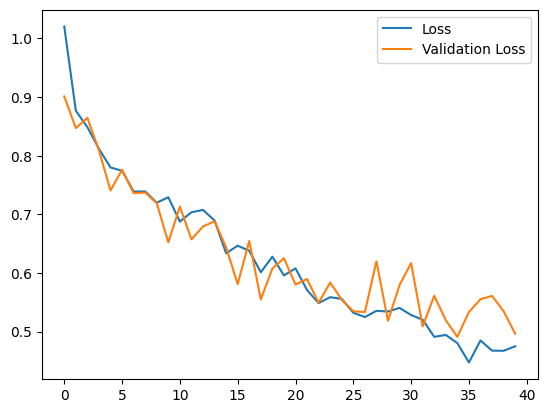

In [ ]:
plt.plot(train_logs_3.history['loss'], label='Loss')
plt.plot(train_logs_3.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


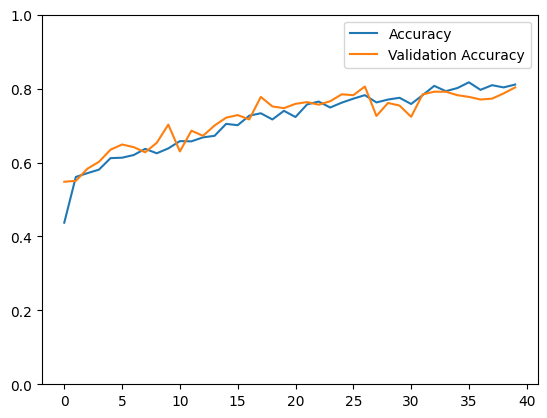

In [ ]:
plt.plot(train_logs_3.history['accuracy'], label='Accuracy')
plt.plot(train_logs_3.history['val_accuracy'], label='Validation Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [28]:
# Định nghĩa hàm để load và chuẩn bị hình ảnh
def load_and_prepare_image(image_path):
    img = keras.preprocessing.image.load_img(
        image_path, target_size=(256, 256)
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Tạo batch dimension
    return img_array

# Hàm để dự đoán lớp của hình ảnh
def predict_image_class(image_path, model):
    img = load_and_prepare_image(image_path)
    predictions = model.predict(img)
    class_index = tf.argmax(predictions[0]).numpy()
    return class_index

1/1 [==============================] - 2s 2s/step


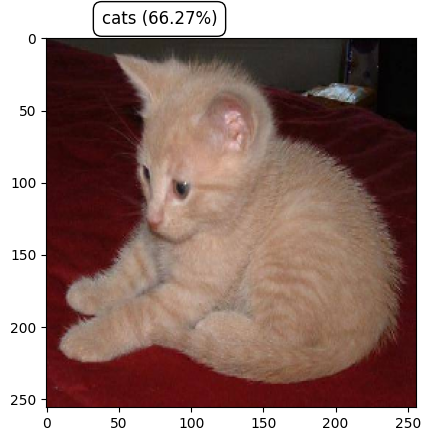

cats 66.27357602119446
1/1 [==============================] - 1s 836ms/step


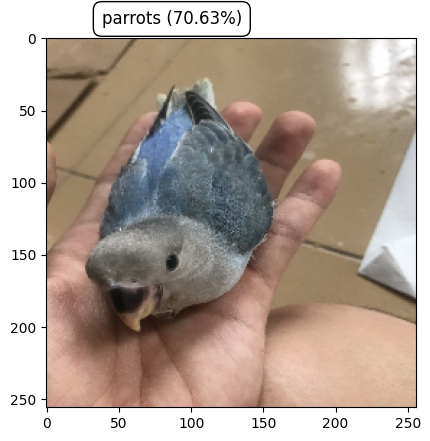

parrots 70.63183188438416
1/1 [==============================] - 1s 783ms/step


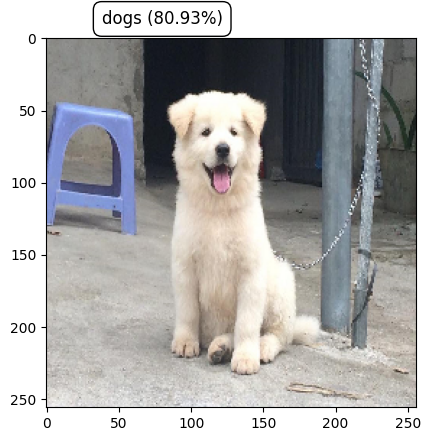

dogs 80.9298574924469


In [51]:
# Danh sách các đường dẫn đến các ảnh cần dự đoán
image_paths = [
    "/content/cat1.jpg",
    "/content/chim2.jpg",
    "/content/cho1.jpg"
]

categories = ["cats", "dogs", "parrots"]

model = keras.models.load_model('/content/model3.h5')


# Duyệt qua từng đường dẫn ảnh
for img_path in image_paths:
    # Load ảnh
    img = image.load_img(img_path, target_size=(256, 256))

    # Dự đoán
    pred = model.predict(image.img_to_array(img)[np.newaxis, ...])
    Res = np.argmax(pred, axis=1)

    # In kết quả
    result_text = "{} ({:.2f}%)".format(categories[Res[0]], pred[0][Res[0]] * 100)
    plt.imshow(img)
    plt.text(38, -10, result_text, color="black", fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    plt.show()
    print(categories[Res[0]], pred[0][Res[0]] * 100)